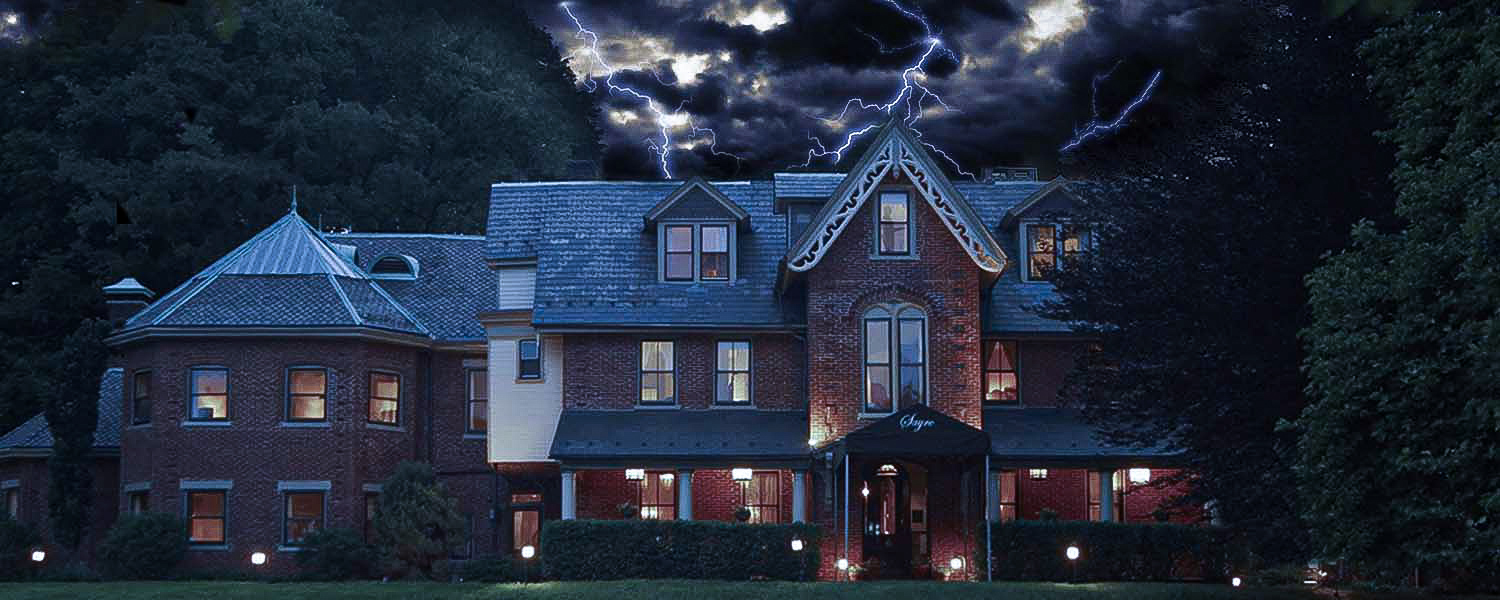

#Estructura del juego

La historia con nuestro detective 🕵️ llegando a la mansion Blackwood, unas horas despues de que se reportara un asesinato 🔪🩸💀

- La victima de asesinato **siempre** es Bruno Blackwood.
- En cada partida **el asesino a descubrir** es diferente.

## Personajes

1. Elon: Mejor amigo de la victima 🤗
2. Greta: Pareja de la victima 💑
3. Jeff Blackwood: Hermano de la victima 🧑🤝🧑
4. Podrick: El hijo bastardo de la victima 👨‍👦
5. Teresa: Pareja de Podrick 👫
6. Alfred: Mayor domo de la mansion Blackwood 🎩
7. Bruno Blackwood: Victima 💀

### Conductas y relaciones personales con Bruno

* **Elon:** es impulsivo y en ocasiones irracional. Hace mucho tiempo hizo un gran favor a Bruno, desde entonces han sido grandes amigos. Elon está obsesionado con Greta.

* **Greta:** Es la pareja sentimental de bruno. Greta siempre tuvo problemas económicos hasta que conoció Bruno y conoce sus inteciones, aunque lo ama, no está nada feliz con la idea de volver a ser pobre.

* **Jeff Blackwood:** Es el hermano de Bruno. La codicia de Jeff lo ha llevado a tener deudas impagables con personas peligrosas.

* **Podrick:** Es una persona susceptible a ser manipulada. Es el hijo de Bruno. Bruno siempre lo ha considerado ilegitimo por sospechas de infidelidad de su exesposa.

* **Teresa:** Es la pareja de Podrick. Es también una persona sagaz y manipuladora.

* **Alfred:** Es frio como el hielo. Ha pasado casi toda su vida siendo el mayordomo de la familia Blackwood, lo que le ha permitido conocer todos los oscuros secretos de la familia.

* **Bruno Blackwood:** Es quien tiene el poder económico de la familia. Se dice que la fortuna de los Blackwood fue amasada de formas poco éticas. Bruno planea heredar el poder de la familia a Elon debido a la enorme gratitud que tiene con él.

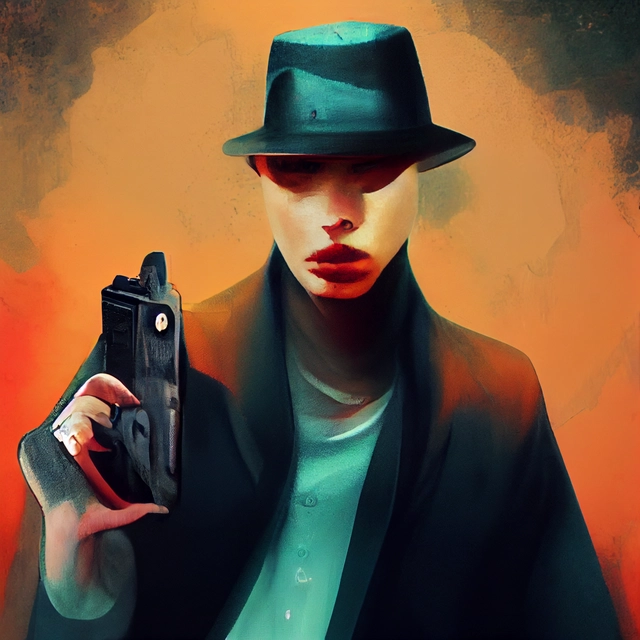

In [ ]:
#@title Instalamos la librería pomegranate.py

pip install pomegranate

In [24]:
#@title Traemos los módulos adicionales que hemos creado

from Search import *
from Logic import *

In [3]:
#@title Importamos las librerias necesarias

import random, time, termcolor

In [ ]:
#@title Definimos los PERSONAJES, HABITACIONES y ARMAS usando la clase Symbol traida desde Logic

# PERSONAJES (7)
Elon = Symbol('Elon')
Greta = Symbol('Greta')
Jeff = Symbol('Jeff')
Podrick = Symbol('Podrick')
Teresa = Symbol('Teresa')
Alfred = Symbol('Alfred')
Bruno = Symbol('Bruno')

# HABITACIONES (9)
comedor = Symbol('Comedor')
hab_jeff = Symbol('Habitación de Jeff')
hab_bruno = Symbol('Habitacion de Bruno')
hab_huesped = Symbol('Habitacion de huéspedes')
sala = Symbol('Sala de estár')
sotano = Symbol('Sotano')
balcon = Symbol('Balcón')
patio = Symbol('Patio')
cocina = Symbol('Cocina')

# ARMAS (4)
revolver = Symbol("Revolver")
hacha = Symbol("Hacha")
veneno = Symbol("Veneno")
cuchillo = Symbol("Cuchillo")

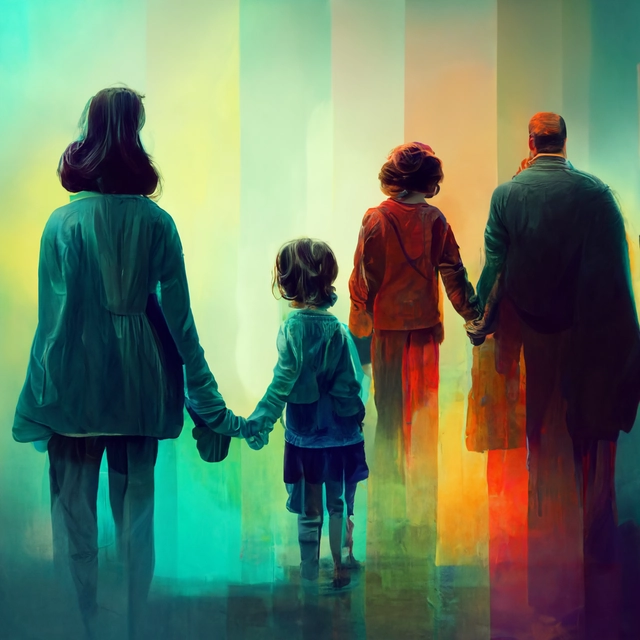

In [ ]:
#@title Creamos listas de PERSONAJES, HABITACIONES y ARMAS para acceder facilmente a ellos

# En la lista de PERSONAJES no incluimos a Bruno
personajes = [Elon, Greta, Jeff, Podrick, Teresa, Alfred]
habitaciones = [comedor, hab_jeff, hab_bruno, hab_huesped, sala, sotano, balcon, patio, cocina]
armas = [revolver, hacha, veneno, cuchillo]

In [ ]:
#@title Copiamos las listas para poder iterar sobre ellas

posibles = ["Elon", "Greta", "Jeff", "Podrick", "Teresa", "Alfred"]
characteres = personajes.copy()

bedrooms = habitaciones.copy()

weapons = armas.copy()

In [ ]:
#@title Creamos una lista de simbolos agregandolos todos en una única lista
simbolos = personajes + habitaciones + armas

In [ ]:
#@title Matriz de elementos y lista de evidencias

parametros = [habitaciones, personajes, armas]
evidencias = []

In [4]:
#@title Generamos evidencias al azar

for i in range(len(habitaciones)):
  n_evidencias = random.randint(0,2)
  evidencia = []
  # Seleccionamos una habitación al azar
  habitacion = random.choice(parametros[0])
  parametros[0].remove(habitacion)
  evidencia.append(habitacion)
  for j in range(n_evidencias):
    # Seleccionamos un arma o un personaje o la dos

    if not len(parametros[1]) == 0 or not len(parametros[2]) == 0:
      number = j+1
    if len(parametros[1]) == 0:
      number = 2
    if len(parametros[2]) == 0:
      number = 1
    if len(parametros[1]) == 0 and len(parametros[2]) == 0:
      break

    eleccion = random.choice(parametros[number])
    # Remover elección
    parametros[number].remove(eleccion)
    evidencia.append(eleccion)

  #Añadimos evidencia
  evidencias.append(evidencia)

evidencias

Comedor Revolver
True


[[Sala de estár, Jeff],
 [Habitacion de huéspedes],
 [Cocina],
 [Patio, Greta, Revolver],
 [Habitacion de Bruno, Elon, Veneno],
 [Sotano],
 [Balcón, Podrick],
 [Habitación de Jeff],
 [Comedor, Teresa, Hacha]]

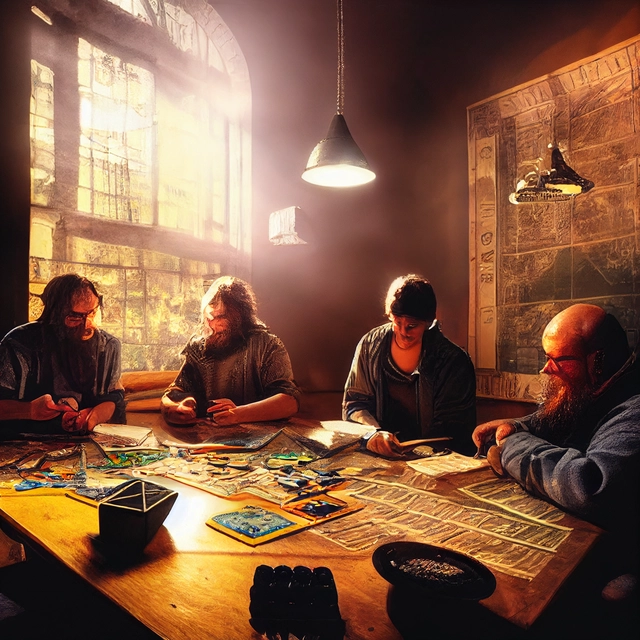

In [ ]:
#@title Creamos el estado actual, el objetivo y el punto inicial para nuestra busqueda

habitaciones = [[["No visitado",evidencias[0]], ["No visitado", evidencias[1]], ["No visitado", evidencias[2]]],
                [["No visitado", evidencias[3]], ["No visitado",evidencias[4]], ["No visitado",evidencias[5]]],
                [["No visitado",evidencias[6]],["No visitado",evidencias[7]], ["No visitado", evidencias[8]]] ]

objetivo =     [[["Check",evidencias[0]], ["Check", evidencias[1]], ["Check", evidencias[2]]],
                [["Check", evidencias[3]], ["Check",evidencias[4]], ["Check",evidencias[5]]],
                [["Check",evidencias[6]],["Check",evidencias[7]], ["Check", evidencias[8]]] ]

state1 = [(0, 0),habitaciones]

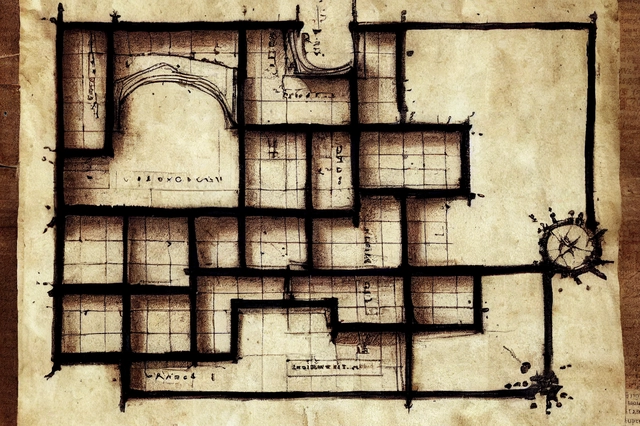

In [5]:
#@title Parametros del juego

spected_killer = And(
    Or(Elon, Greta, Jeff, Podrick, Teresa, Alfred),
    #Or(hacha, revolver, veneno, cuchillo),
    #Or(hab_bruno, hab_jeff, hab_huesped, balcon, cocina, sotano, patio, sala, comedor)
)


class Agent(SimpleProblemSolvingAgentProgram):

    def update_state(self, state, percept):
        return percept

    def formulate_goal(self, state):
        goal = len(habitaciones)*len(habitaciones[0])
        return goal

    def formulate_problem(self, state, goal):
        problem = state, goal
        return problem

    def check_knowledge(self,conocimiento):

        for symbol in simbolos:
            if model_check(conocimiento, symbol):
                termcolor.cprint(f"\n{symbol}: SI", "green")
                if (symbol in posibles):
                    print("Encontrado")
                    self.culpable = True

            elif not model_check(conocimiento, Not(symbol)):
                print(f"{symbol}: TAL VEZ")

    def Logic(self,pruebas,conocimiento):

        print()
        print("Revisando")
        time.sleep(1)

        if len(pruebas)-1 == 2:
            #Esto es verdadero pero no lo considera verdadero
            #Entra acá pero no entra al 1
            if pruebas[1] in characteres and pruebas[2] in weapons:
                print(1)
                self.sospechosos.append(pruebas)
                #spected_killer.add(Biconditional(pruebas[1],And(pruebas[0], pruebas[2])))

            else:
                spected_killer.add(And(Not(pruebas[0]),Not(pruebas[1]), Not(pruebas[2])))

        elif len(pruebas)-1 == 1:
            print("2")
            spected_killer.add(And(Not(pruebas[0]),Not(pruebas[1])))
        else:
            print("3")
            spected_killer.add(Not(pruebas[0]))



        self.check_knowledge(conocimiento)

    def End(self, conocimiento):
        for sospechoso in self.sospechosos:
            conocimiento.add(Biconditional(sospechoso[1],And(sospechoso[0], sospechoso[2])))

        if self.culpable:
            self.check_knowledge(conocimiento)

    def search(self, problem):

        self.num_explorados = 0
        state, goal = problem
        # Inicializamos la frontera para empezar en la posicion inicial
        start = Nodo(estado=state, padre=None, accion=None)
        frontera = Pila()
        frontera.add(start)

        # Inicializamos en conjunto explorado vacio
        self.explorado = set()
        self.cont = 0
        self.culpable = False
        self.sospechosos = []

        # Manetenmos el bucle hasta que encontremos la solución
        while True:

            # Si nada queda en la frontera, entonces no hya mas camino

            if frontera.empty():
                print(self.cont)
                raise Exception("No hay Solución")

            # Escogemos un nodo de la frontera
            nodo = frontera.eliminar()
            n,k = nodo.estado[0]
            self.num_explorados +=1
            if nodo.accion == "revisando":
                n,k = nodo.estado[0]
                self.cont += 1
                nodo.estado[1][n][k][0] = "Check"
                #Leemos evidencia
                self.Logic(nodo.estado[1][n][k][1],spected_killer)


            # Si el nodo es el objetivo, entonces tenemos una solución
            if nodo.estado[1] == objetivo or self.culpable:

                self.End(spected_killer)
                acciones = []
                cel = []
                # Rastreamos los nodos padre hasta la solución (objetivo hasta estado inicial)
                while nodo.padre is not None:
                    acciones.append(nodo.accion)
                    cel.append(nodo.estado)
                    nodo = nodo.padre
                acciones.reverse()
                cel.reverse()
                self.solucion = (acciones, cel)
                return acciones, self.sospechosos

            # Marcamos el nodo como exploado
            n,k = nodo.estado[0]
            if not nodo.estado[1][n][k][0] == "No visitado":
                self.explorado.add(nodo.estado[0])
            # Agregamos vecinos a la frontera
            for accion, estado in self.acciones_valida(nodo.estado):
                if not frontera.contiene_estado(estado[0]) and estado[0] not in self.explorado:
                    hijo = Nodo(estado = estado, padre = nodo, accion=accion)
                    frontera.add(hijo)

    def acciones_valida(self, state):
        fila, col = state[0]
        self.altura = len(habitaciones)
        self.ancho = len(habitaciones[0])
        candidatos = [
            ("up", (fila -1, col)),
            ("down", (fila +1, col)),
            ("left", (fila, col -1)),
            ("right", (fila, col +1)),
            ("revisando", (fila, col))
        ]
        resultados = []
        for accion, (f,c) in candidatos:
            if 0<=f < self.altura and 0<=c < self.ancho:
                if state[1][f][c][0] == "No visitado":
                    resultados.append((accion,[(f,c), state[1]]))
                if not state[1][f][c][0] == "No visitado" and not accion == "revisando":
                    resultados.append((accion,[(f,c), state[1]]))

        return resultados


a = Agent(state1)
acciones, sospechosos = a(state1)
print("")
print("Busqueda")
print(acciones)
print("")
print("Sospechosos")
print(sospechosos)

[[Sala de estár, Jeff], [Habitacion de huéspedes], [Cocina], [Patio, Greta, Revolver], [Habitacion de Bruno, Elon, Veneno], [Sotano], [Balcón, Podrick], [Habitación de Jeff], [Comedor, Teresa, Hacha]]

Revisando
2
Elon: TAL VEZ
Greta: TAL VEZ
Podrick: TAL VEZ
Teresa: TAL VEZ
Alfred: TAL VEZ
Comedor: TAL VEZ
Habitación de Jeff: TAL VEZ
Habitacion de Bruno: TAL VEZ
Habitacion de huéspedes: TAL VEZ
Sotano: TAL VEZ
Balcón: TAL VEZ
Patio: TAL VEZ
Cocina: TAL VEZ
Revolver: TAL VEZ
Hacha: TAL VEZ
Veneno: TAL VEZ
Cuchillo: TAL VEZ

Revisando
3
Elon: TAL VEZ
Greta: TAL VEZ
Podrick: TAL VEZ
Teresa: TAL VEZ
Alfred: TAL VEZ
Comedor: TAL VEZ
Habitación de Jeff: TAL VEZ
Habitacion de Bruno: TAL VEZ
Sotano: TAL VEZ
Balcón: TAL VEZ
Patio: TAL VEZ
Cocina: TAL VEZ
Revolver: TAL VEZ
Hacha: TAL VEZ
Veneno: TAL VEZ
Cuchillo: TAL VEZ

Revisando
3
Elon: TAL VEZ
Greta: TAL VEZ
Podrick: TAL VEZ
Teresa: TAL VEZ
Alfred: TAL VEZ
Comedor: TAL VEZ
Habitación de Jeff: TAL VEZ
Habitacion de Bruno: TAL VEZ
Sotano: TAL

In [6]:
#@title Restricciones lógicas

# Le indicamos que solo uno posible por personaje, arma y habitacion
spected_killer.add(Or(

    And(Elon, Not(Greta), Not(Jeff), Not(Podrick), Not(Teresa), Not(Alfred)),
    And(Greta, Not(Elon), Not(Jeff), Not(Podrick), Not(Teresa), Not(Alfred)),
    And(Jeff, Not(Greta), Not(Elon), Not(Podrick), Not(Teresa), Not(Alfred)),
    And(Podrick, Not(Jeff), Not(Greta), Not(Elon), Not(Teresa), Not(Alfred)),
    And(Teresa, Not(Podrick), Not(Jeff), Not(Greta), Not(Elon), Not(Alfred)),
    And(Alfred, Not(Teresa), Not(Podrick), Not(Jeff), Not(Greta), Not(Elon)),
))

# Restricciones para que haya solo una habitación
spected_killer.add(Or(
    And(hab_bruno, Not(hab_jeff), Not(hab_huesped), Not(patio), Not(sotano), Not(cocina), Not(comedor), Not(sala), Not(balcon)),
    And(hab_jeff, Not(hab_bruno), Not(hab_huesped), Not(patio), Not(sotano), Not(cocina), Not(comedor), Not(sala), Not(balcon)),
    And(hab_huesped, Not(hab_jeff), Not(hab_bruno), Not(patio), Not(sotano), Not(cocina), Not(comedor), Not(sala), Not(balcon)),
    And(patio, Not(hab_jeff), Not(hab_bruno), Not(hab_huesped), Not(sotano), Not(cocina), Not(comedor), Not(sala), Not(balcon)),
    And(sotano, Not(hab_jeff), Not(hab_bruno), Not(hab_huesped), Not(patio), Not(cocina), Not(comedor), Not(sala), Not(balcon)),
    And(cocina, Not(hab_jeff), Not(hab_bruno), Not(hab_huesped), Not(patio), Not(sotano), Not(comedor), Not(sala), Not(balcon)),
    And(comedor, Not(hab_jeff), Not(hab_bruno), Not(hab_huesped), Not(patio), Not(sotano), Not(cocina), Not(sala), Not(balcon)),
    And(sala, Not(hab_jeff), Not(hab_bruno), Not(hab_huesped), Not(patio), Not(sotano), Not(cocina), Not(comedor), Not(balcon)),
    And(balcon, Not(hab_jeff), Not(hab_bruno), Not(hab_huesped), Not(patio), Not(sotano), Not(cocina), Not(comedor), Not(sala)),
))

# Restricciones para que haya solo un arma
spected_killer.add(Or(
    And(revolver, Not(hacha), Not(veneno), Not(cuchillo)),
    And(hacha, Not(revolver),  Not(cuchillo), Not(veneno)),
    And(veneno, Not(revolver),  Not(hacha), Not(cuchillo)),
    And(cuchillo, Not(revolver),  Not(hacha), Not(veneno))
))

In [7]:
#@title Comprobamos lo qu sabemos hasta el momento

# En caso de que haya un culpable
a.check_knowledge(spected_killer)

Elon: TAL VEZ
Greta: TAL VEZ
Teresa: TAL VEZ
Alfred: TAL VEZ
Comedor: TAL VEZ
Habitacion de Bruno: TAL VEZ
Patio: TAL VEZ
Revolver: TAL VEZ
Hacha: TAL VEZ
Veneno: TAL VEZ
Cuchillo: TAL VEZ


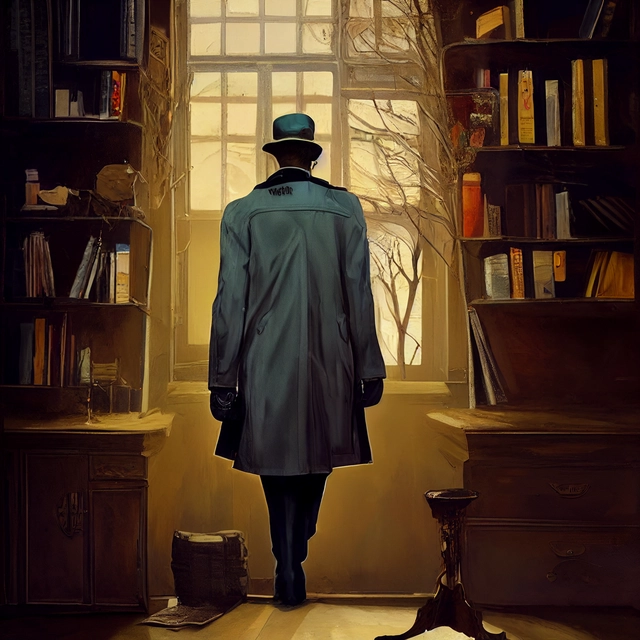

In [9]:
#@title Construcción de la red Bayesiana

from pomegranate import *


Antecedentes = Node(DiscreteDistribution({
    "Ratero": 0.06,
    "Asesino": 0.001,
    "Neutro": 0.939
}), name="Antecedentes")


# Relación con el muerto
Relacion = Node(DiscreteDistribution({
    "Madre": 0.08,	
    "Padre": 0.08,	 
    "Hijo": 0.1,	
    "Hermano": 0.08,	
    "Amigo": 0.16,	
    "Abuelo": 0.08,	
    "Nieto": 0.14,	
    "Pareja": 0.04,	
    "Ninguna": 0.24
}), name="Relacion")


Consumo = Node(DiscreteDistribution({
    "Alcohol": 0.04,	
    "Droga": 0.01 ,
    "Normal": 0.95
}), name="Consumo")


# Benecios obtenidos del muerto, ya sea gracias a su muerte o en vida

Beneficios = Node(ConditionalProbabilityTable([
    ["Madre","Sostenimiento",0.2],
    ["Madre","Herencia",0.25],
    ["Madre","Sostenimiento y Herencia",0.15],
    ["Madre","Nada",0.4],

    ["Padre","Sostenimiento",0.2],
    ["Padre","Herencia",0.25],
    ["Padre","Sostenimiento y Herencia", 0.15],
    ["Padre","Nada", 0.4],

    ["Hijo","Sostenimiento",0.3],
    ["Hijo","Herencia",0.1],
    ["Hijo","Sostenimiento y Herencia",0.45],
    ["Hijo","Nada",0.15],

    ["Hermano","Sostenimiento",0.2],
    ["Hermano","Herencia",0.1],
    ["Hermano","Sostenimiento y Herencia",0.05],
    ["Hermano","Nada",0.65],

    ["Amigo","Sostenimiento",0.08],
    ["Amigo","Herencia",0.03],
    ["Amigo","Sostenimiento y Herencia",0.02],
    ["Amigo","Nada",0.87],

    ["Abuelo","Sostenimiento",0.14],
    ["Abuelo","Herencia",0.06],
    ["Abuelo","Sostenimiento y Herencia",0.04],
    ["Abuelo","Nada",0.76],

    ["Nieto","Sostenimiento",0.05],
    ["Nieto","Herencia",0.3],
    ["Nieto","Sostenimiento y Herencia",0.15],
    ["Nieto","Nada",0.5],

    ["Pareja","Sostenimiento",0.2],
    ["Pareja","Herencia",0.3],
    ["Pareja","Sostenimiento y Herencia",0.4],
    ["Pareja","Nada",0.1],

    ["Ninguna","Sostenimiento",0.02],
    ["Ninguna","Herencia",0.015],
    ["Ninguna","Sostenimiento y Herencia",0.005],
    ["Ninguna","Nada",0.96]

],[Relacion.distribution]), name="Beneficios")

#Emociones hacia el muerto

Emociones = Node(ConditionalProbabilityTable([
    ["Madre","Odio",0.1],
    ["Madre","Amor",0.75],
    ["Madre","Celos",0.01],
    ["Madre","Ninguno",0.14],

    ["Padre","Odio",0.1],
    ["Padre","Amor",0.75],
    ["Padre","Celos", 0.01],
    ["Padre","Ninguno", 0.14],

    ["Hijo","Odio",0.25],
    ["Hijo","Amor",0.6],
    ["Hijo","Celos",0.01],
    ["Hijo","Ninguno",0.14],

    ["Hermano","Odio",0.15],
    ["Hermano","Amor",0.5],
    ["Hermano","Celos",0.2],
    ["Hermano","Ninguno",0.15],

    ["Amigo","Odio",0.15],
    ["Amigo","Amor",0.35],
    ["Amigo","Celos",0.25],
    ["Amigo","Ninguno",0.25],

    ["Abuelo","Odio",0.1],
    ["Abuelo","Amor",0.55],
    ["Abuelo","Celos",0.03],
    ["Abuelo","Ninguno",0.32],

    ["Nieto","Odio",0.25],
    ["Nieto","Amor",0.6],
    ["Nieto","Celos",0.01],
    ["Nieto","Ninguno",0.14],

    ["Pareja","Odio",0.03],
    ["Pareja","Amor",0.65],
    ["Pareja","Celos",0.3],
    ["Pareja","Ninguno",0.02],

    ["Ninguna","Odio",0.1],
    ["Ninguna","Amor",0.1],
    ["Ninguna","Celos",0.2],
    ["Ninguna","Ninguno",0.6]

],[Relacion.distribution]), name="Emociones")

# Tiene motivos para matarlo?

Motivo = Node(ConditionalProbabilityTable([
    ["Ratero"  ,"Odio"  ,  "Sostenimiento", "Si",0.5175],
    ["Ratero"  ,"Odio"  ,  "Sostenimiento", "No",0.4825],
    ["Ratero"  ,"Odio"  ,  "Herencia", "Si",0.83375],
    ["Ratero"  ,"Odio"  ,  "Herencia", "No",0.16625],
    ["Ratero"  ,"Odio"  ,  "Sostenimiento y Herencia", "Si",0.71875],
    ["Ratero"  ,"Odio"  ,  "Sostenimiento y Herencia", "No",0.28125],
    ["Ratero"  ,"Odio"  ,  "Nada", "Si",0.618125],
    ["Ratero"  ,"Odio"  ,  "Nada", "No",0.381875],
    ["Asesino" ,"Odio"  ,  "Sostenimiento", "Si",0.585],
    ["Asesino" ,"Odio"  ,  "Sostenimiento", "No",0.415],
    ["Asesino" ,"Odio"  ,  "Herencia", "Si",0.9425],
    ["Asesino" ,"Odio"  ,  "Herencia", "No",0.0575],
    ["Asesino" ,"Odio"  ,  "Sostenimiento y Herencia", "Si",0.8125],
    ["Asesino" ,"Odio"  ,  "Sostenimiento y Herencia", "No",0.1875],
    ["Asesino" ,"Odio"  ,  "Nada", "Si",0.69875],
    ["Asesino" ,"Odio"  ,  "Nada", "No",0.30125],
    ["Neutro"  ,"Odio"  ,  "Sostenimiento", "Si",0.4275],
    ["Neutro"  ,"Odio"  ,  "Sostenimiento", "No",0.5725],
    ["Neutro"  ,"Odio"  ,  "Herencia", "Si",0.68875],
    ["Neutro"  ,"Odio"  ,  "Herencia", "No",0.31125],
    ["Neutro"  ,"Odio"  ,  "Sostenimiento y Herencia", "Si",0.59375],
    ["Neutro"  ,"Odio"  ,  "Sostenimiento y Herencia", "No",0.40625],
    ["Neutro"  ,"Odio"  ,  "Nada", "Si",0.510625],
    ["Neutro"  ,"Odio"  ,  "Nada", "No",0.489375],

    ["Ratero"  ,"Amor"  ,  "Sostenimiento", "Si",0.0828],
    ["Ratero"  ,"Amor"  ,  "Sostenimiento", "No",0.9172],
    ["Ratero"  ,"Amor"  ,  "Herencia", "Si",0.1334],
    ["Ratero"  ,"Amor"  ,  "Herencia", "No",0.8666],
    ["Ratero"  ,"Amor"  ,  "Sostenimiento y Herencia", "Si",0.115],
    ["Ratero"  ,"Amor"  ,  "Sostenimiento y Herencia", "No",0.885],
    ["Ratero"  ,"Amor"  ,  "Nada", "Si",0.0989],
    ["Ratero"  ,"Amor"  ,  "Nada", "No",0.9011],
    ["Asesino" ,"Amor"  ,  "Sostenimiento", "Si",0.0936],
    ["Asesino" ,"Amor"  ,  "Sostenimiento","No",0.9064],
    ["Asesino" ,"Amor"  ,  "Herencia", "Si",0.1508],
    ["Asesino" ,"Amor"  ,  "Herencia", "No",0.8492],
    ["Asesino" ,"Amor"  ,  "Sostenimiento y Herencia", "Si",0.13],
    ["Asesino" ,"Amor"  ,  "Sostenimiento y Herencia", "No",0.87],
    ["Asesino" ,"Amor"  ,  "Nada", "Si",0.1118],
    ["Asesino" ,"Amor"  ,  "Nada", "No",0.8882],
    ["Neutro"  ,"Amor"  ,  "Sostenimiento", "Si",0.0684],
    ["Neutro"  ,"Amor"  ,  "Sostenimiento", "No",0.9316],
    ["Neutro"  ,"Amor"  ,  "Herencia", "Si",0.1102],
    ["Neutro"  ,"Amor"  ,  "Herencia", "No",0.8898],
    ["Neutro"  ,"Amor"  ,  "Sostenimiento y Herencia", "Si",0.095],
    ["Neutro"  ,"Amor"  ,  "Sostenimiento y Herencia", "No",0.905],
    ["Neutro"  ,"Amor"  ,  "Nada", "Si",0.0817],
    ["Neutro"  ,"Amor"  ,  "Nada", "No",0.9183],

    ["Ratero"  ,"Celos" ,	 "Sostenimiento", "Si",0.5382],
    ["Ratero"  ,"Celos" ,	 "Sostenimiento", "No",0.4618],
    ["Ratero"  ,"Celos" ,	 "Herencia", "Si",0.8671],
    ["Ratero"  ,"Celos" ,	 "Herencia", "No",0.1329],
    ["Ratero"  ,"Celos" ,	 "Sostenimiento y Herencia", "Si",0.7475],
    ["Ratero"  ,"Celos" ,	 "Sostenimiento y Herencia", "No",0.2525],
    ["Ratero"  ,"Celos" ,	 "Nada", "Si",0.64285],
    ["Ratero"  ,"Celos" ,	 "Nada", "No",0.35715],
    ["Asesino" ,"Celos" ,  "Sostenimiento", "Si",0.6084],
    ["Asesino" ,"Celos" ,  "Sostenimiento", "No",0.3916],
    ["Asesino" ,"Celos" , "Herencia", "Si",0.9802],
    ["Asesino" ,"Celos" , "Herencia", "No",0.0198],  
    ["Asesino" ,"Celos" ,  "Sostenimiento y Herencia", "Si",0.845],
    ["Asesino" ,"Celos" ,  "Sostenimiento y Herencia", "No",0.155],
    ["Asesino" ,"Celos" ,  "Nada", "Si",0.7267],
    ["Asesino" ,"Celos" ,  "Nada", "No",0.2733],
    ["Neutro"  ,"Celos" , "Sostenimiento", "Si",0.4446],
    ["Neutro"  ,"Celos" , "Sostenimiento", "No",0.5554],
    ["Neutro"  ,"Celos" ,  "Herencia", "Si",0.7163],
    ["Neutro"  ,"Celos" ,  "Herencia", "No",0.2837],
    ["Neutro"  ,"Celos" ,  "Sostenimiento y Herencia", "Si",0.6175],
    ["Neutro"  ,"Celos" ,  "Sostenimiento y Herencia", "No",0.3825],
    ["Neutro"  ,"Celos" ,  "Nada", "Si",0.53105],
    ["Neutro"  ,"Celos" ,  "Nada", "No",0.46895],

    ["Ratero"  ,"Ninguno", "Sostenimiento", "Si",0.284625],
    ["Ratero"  ,"Ninguno", "Sostenimiento", "No",0.715375],
    ["Ratero"  ,"Ninguno", "Herencia", "Si",0.4585625],
    ["Ratero"  ,"Ninguno", "Herencia", "No",0.5414375],
    ["Ratero"  ,"Ninguno", "Sostenimiento y Herencia", "Si",0.3953125],
    ["Ratero"  ,"Ninguno", "Sostenimiento y Herencia", "No",0.6046875],
    ["Ratero"  ,"Ninguno", "Nada", "Si",0.33996875],
    ["Ratero"  ,"Ninguno", "Nada", "No",0.66003125],
    ["Asesino" ,"Ninguno", "Sostenimiento", "Si",0.32175],
    ["Asesino" ,"Ninguno", "Sostenimiento", "No",0.67825],
    ["Asesino" ,"Ninguno", "Herencia", "Si",0.518375],
    ["Asesino" ,"Ninguno", "Herencia", "No",0.481625],
    ["Asesino" ,"Ninguno", "Sostenimiento y Herencia", "Si",0.446875],
    ["Asesino" ,"Ninguno", "Sostenimiento y Herencia", "No",0.553125],
    ["Asesino" ,"Ninguno", "Nada", "Si",0.3843125],
    ["Asesino" ,"Ninguno", "Nada", "No",0.6156875],
    ["Neutro"  ,"Ninguno", "Sostenimiento", "Si",0.235125],
    ["Neutro"  ,"Ninguno", "Sostenimiento", "No",0.764875],
    ["Neutro"  ,"Ninguno", "Herencia", "Si",0.3788125],
    ["Neutro"  ,"Ninguno", "Herencia", "No",0.6211875],
    ["Neutro"  ,"Ninguno", "Sostenimiento y Herencia", "Si",0.3265625],
    ["Neutro"  ,"Ninguno", "Sostenimiento y Herencia", "No",0.6734375],
    ["Neutro"  ,"Ninguno", "Nada", "Si",0.28084375],
    ["Neutro"  ,"Ninguno", "Nada", "No",0.71915625]


],[Antecedentes.distribution, Emociones.distribution, Beneficios.distribution]), name="Motivo")

Asesino = Node(ConditionalProbabilityTable([

    ["Si" ,	"Alcohol", "Culpable", 0.9],
    ["Si" ,	"Alcohol", "Inocente",0.1],
    ["Si" ,	"Droga", "Culpable", 0.95],
    ["Si" ,	"Droga", "Inocente", 0.05],
    ["Si" ,	"Normal", "Culpable", 0.8],
    ["Si" ,	"Normal", "Inocente",0.2],
    ["No" ,	"Alcohol", "Culpable", 0.2],
    ["No" ,	"Alcohol", "Inocente",0.8],
    ["No" ,	"Droga", "Culpable", 0.35],
    ["No" ,	"Droga", "Inocente", 0.65],
    ["No"	, "Normal", "Culpable", 0.05],
    ["No"	, "Normal", "Inocente", 0.95]

],[Motivo.distribution, Consumo.distribution]), name="Asesino")


# Creamos una Red Bayesiana y añadimos estados
modelo = BayesianNetwork()
#modelo.add_states(Antecedentes, Relacion, Consumo, Beneficios, Emociones, Motivo, Asesino)
modelo.add_states(Antecedentes, Relacion, Consumo, Beneficios,Emociones, Motivo, Asesino)

# Añadimos bordes que conecten nodos
modelo.add_edge(Relacion, Emociones)
modelo.add_edge(Relacion, Beneficios)
modelo.add_edge(Antecedentes, Motivo)
modelo.add_edge(Emociones, Motivo)
modelo.add_edge(Beneficios, Motivo)
modelo.add_edge(Motivo, Asesino)
modelo.add_edge(Consumo, Asesino)

#Modelo Final
modelo.bake()

In [11]:
#@title ¿Quién será el culpable?

# Calculemos las predicciones
info_podrick = ['Hijo', 'Odio', 'Sostenimiento']
info_teresa = ['Amigo', 'Celos', 'Nada']
info_alfred = ['Neutro', 'Ninguna', 'Nada']
info_elon = ['Amigo', 'Celos', 'Herencia']
info_jeff = ['Hermano', 'Odio', 'Sostenimiento y Herencia']
info_greta = ['Pareja', 'Amor', 'Sostenimiento y Herencia']


info1 = ['Hijo', 'Odio', 'Sostenimiento']
info2 = ['Amigo', 'Celos', 'Nada']
info3 = ['Neutro', 'Ninguna', 'Nada']
info4 = ['Amigo', 'Celos', 'Heren']
info5 = ['Hermano', 'Odio', 'Sostenimiento y Herencia']
info6 = ['Pareja', 'Amor', 'Sostenimiento y Herencia']

infos = [info1, info2, info3, info4, info5, info6]

presuntos = []

for sospechoso in sospechosos:
  info = random.choice(infos)
  infos.remove(info)

  presunto = [sospechoso[1], info]
  presuntos.append(presunto)

# Para que solo calcule la probabilidad de los últimos 3 sospechosos
culpabilidad = []

for presunto in presuntos:
  print()
  print("Probabilidad para: ",presunto[0])
  print()
  predicciones = modelo.predict_proba({
    'Relacion' : presunto[1][0],
    'Emociones': presunto[1][1],
    'Beneficios': presunto[1][2]
    })
  culpa = [presunto[0]]
  # Visualizemos las predicciones para cada nodo
  for nodo, prediccion in zip(modelo.states, predicciones):
      if isinstance(prediccion, str):
          print(f"{nodo.name}: {prediccion}")
      else:
          print(f"{nodo.name}")
          for valor, probabilidad in prediccion.parameters[0].items(): 
            print(f"       {valor}: {probabilidad:.2f}")

            if valor == "Culpable":
              culpa.append(f'{probabilidad:.2f}')
  culpabilidad.append(culpa)
print(culpabilidad)

values = []
for presunto in culpabilidad:
  values.append(presunto[1])

value = max(values)
index = values.index(value)
culpable = culpabilidad[index]
print(culpable)

spected_killer.add(culpable[0])
a.check_knowledge(spected_killer)


Probabilidad para:  Elon

Antecedentes
       Ratero: 0.06
       Asesino: 0.00
       Neutro: 0.94
Relacion: Amigo
Consumo
       Alcohol: 0.04
       Droga: 0.01
       Normal: 0.95
Beneficios: Nada
Emociones: Celos
Motivo
       No: 0.46
       Si: 0.54
Asesino
       Culpable: 0.46
       Inocente: 0.54

Probabilidad para:  Greta

Antecedentes
       Ratero: 0.06
       Asesino: 0.00
       Neutro: 0.94
Relacion: Hermano
Consumo
       Alcohol: 0.04
       Droga: 0.01
       Normal: 0.95
Beneficios: Sostenimiento y Herencia
Emociones: Odio
Motivo
       No: 0.40
       Si: 0.60
Asesino
       Culpable: 0.51
       Inocente: 0.49

Probabilidad para:  Teresa

Antecedentes
       Ratero: 0.06
       Asesino: 0.00
       Neutro: 0.94
Relacion: Pareja
Consumo
       Alcohol: 0.04
       Droga: 0.01
       Normal: 0.95
Beneficios: Sostenimiento y Herencia
Emociones: Amor
Motivo
       No: 0.90
       Si: 0.10
Asesino
       Culpable: 0.13
       Inocente: 0.87
[[Elon, '0.46'], [Greta, '

In [26]:
#@title ¿Es nuestra predicción acertada de acuerdo a nuestra experiencia?

#Módulo de aprendizaje, [Ejemplo](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)

from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
  distances = list()
  for train_row in train:
    dist = euclidean_distance(test_row, train_row)
    distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1])
  neighbors = list()
  for i in range(num_neighbors):
    neighbors.append(distances[i][0])
  return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
 neighbors = get_neighbors(train, test_row, num_neighbors)
 output_values = [row[-1] for row in neighbors]
 prediction = max(set(output_values), key=output_values.count)
 return prediction

# Test distance function
# Hora del día en que se jugó en decimales 0.0 - 24.0
# ¿En qué OS se jugó? Google, Linux, Windows, iOS, 
# La primera linea identifica la predicción
dataset = [[7.3,0,1],
 [7.1,4,0],
 [9.9,1,0],
 [22.3,3,0],
 [19.4,1,0],
 [12.3,1,1],
 [16.8,2,1],
 [20.4,4,1],
 [19.3,0,1],
 [13.8,0,1]]

prediction = predict_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Expected 1, Got 0.


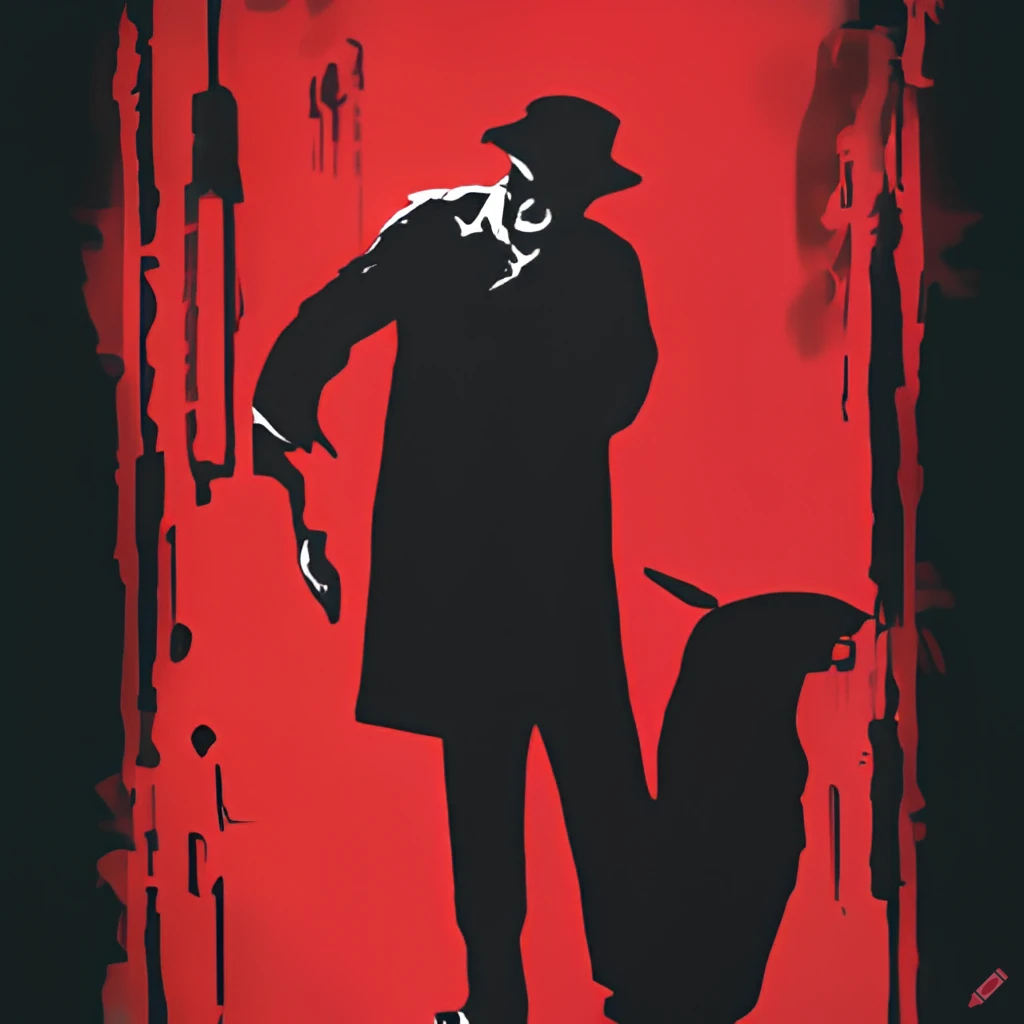

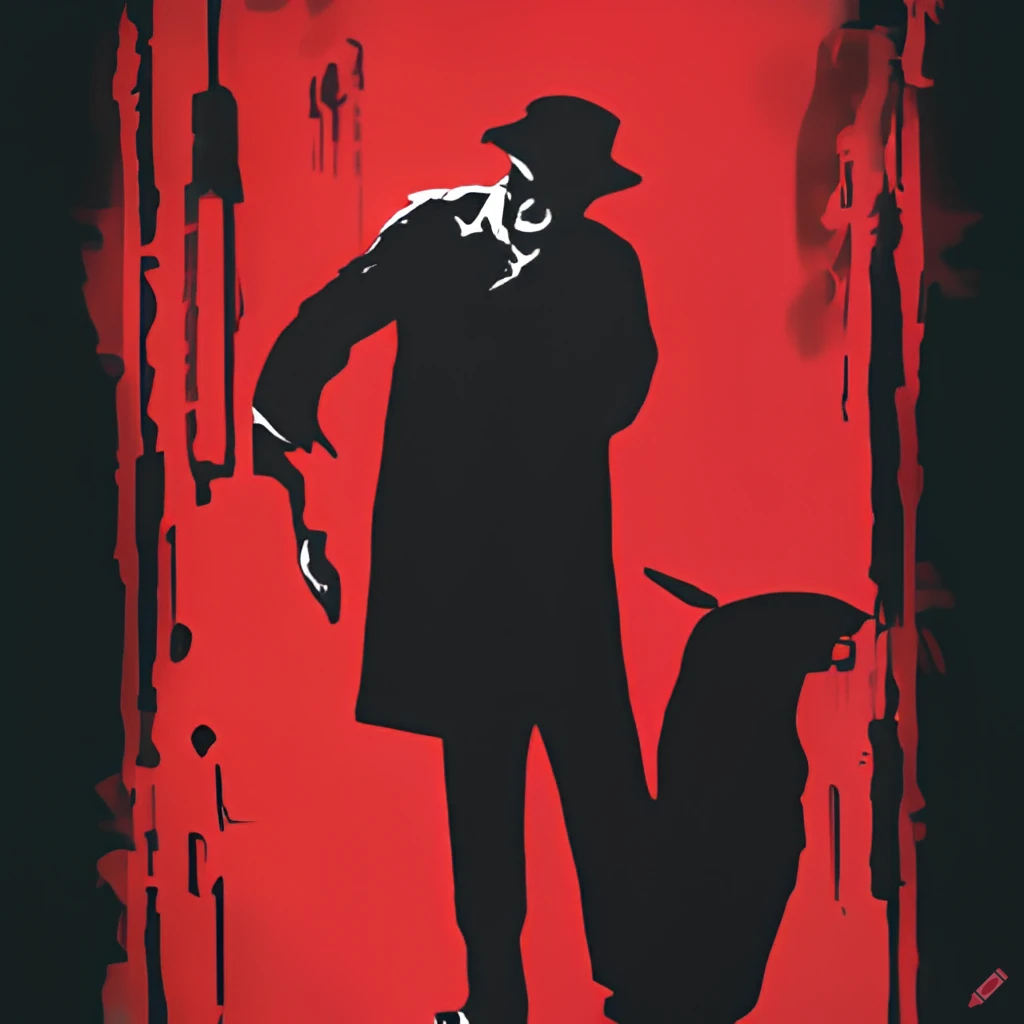

In [32]:
from IPython.display import Image, display

good = "/content/goodx.png"
bad = "/content/badx.png"

if dataset[0][-1] == prediction:
    display(Image(data=good, width=1000, height=1000))
else: 
    display(Image(data=bad, width=1000, height=1000))